In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
%config Completer.use_jedi = False

In [3]:
data = pd.read_csv('Data2v2.csv')
data.drop(['REVENUE'], axis=1, inplace=True)
data.head().style

,CO_COUNTRY,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,NAME_LENGTH,PREMIERE_1,PREMIERE_2,PREMIERE_3,PREMIERE_4,PREMIERE_5,PREMIERE_6,PREMIERE_7,PREMIERE_8,PREMIERE_9,PREMIERE_10,PREMIERE_11,PREMIERE_12,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,LENGTH60,LENGTH90,LENGTH120,LENGTH180,REVENUE_LOG
0,0,6.5e+06,980000,940000,119300,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,True,16.468
1,0,1.43931e+06,700000,700000,70000,11,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,15.3002
2,0,1.3903e+06,695115,695115,100000,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,True,False,False,15.4302
3,0,1.58543e+06,769468,769468,80900,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,False,15.3602
4,0,1.72655e+06,708500,700000,70000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,True,15.1021


In [4]:
#data = data.drop(data.index[0])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 43 columns):
CO_COUNTRY              401 non-null int64
BUDGET                  401 non-null float64
TOTAL_SUPPORT           401 non-null float64
PRODUCTION_SUPPORT      401 non-null float64
DISTRIBUTION_SUPPORT    401 non-null float64
NAME_LENGTH             401 non-null int64
PREMIERE_1              401 non-null int64
PREMIERE_2              401 non-null int64
PREMIERE_3              401 non-null int64
PREMIERE_4              401 non-null int64
PREMIERE_5              401 non-null int64
PREMIERE_6              401 non-null int64
PREMIERE_7              401 non-null int64
PREMIERE_8              401 non-null int64
PREMIERE_9              401 non-null int64
PREMIERE_10             401 non-null int64
PREMIERE_11             401 non-null int64
PREMIERE_12             401 non-null int64
Action                  401 non-null int64
Adventure               401 non-null int64
Animation               401

In [6]:
y = data['REVENUE_LOG'].values
X = data.loc[:, data.columns != 'REVENUE_LOG']

X = sm.add_constant(X)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
# split and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
#exog = sm.add_constant(X_train)
result = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     21.44
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.30e-59
Time:                        15:00:02   Log-Likelihood:                -381.83
No. Observations:                 280   AIC:                             847.7
Df Residuals:                     238   BIC:                             1000.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.1875 

In [9]:
print('\nTraining MSE: ' + str(round(mean_squared_error(y_train, result.predict(X_train)), 0)))
print('Test MSE:    ' + str(round(mean_squared_error(y_test, result.predict(X_test)), 0)))


Training MSE: 1.0
Test MSE:    1.0


##OPTION 1

Should be done overnight, since computing 6 predictors takes a lot of processing in this dataset. Hence, the code is in Raw format, wont activate if running the entire notebook.

In [10]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    
    features = list(feature_set)
    if 'const' not in features:
        features.append('const')
    
    exog = X_train[features]
    exog_test = X_test[features]

    model = sm.OLS(y_train, exog)
    regr = model.fit()
    
    train_MSE = round(mean_squared_error(y_train, regr.predict(exog)), 0)
    test_MSE = round(mean_squared_error(y_test, regr.predict(exog_test)), 0)
    
    RSS = ((regr.predict(exog) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS, "Train MSE": train_MSE, "Test MSE": test_MSE}

In [11]:
def plotFeatureSelection(model):
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The idxmax() function can be used to identify the location of the maximum point of a vector
    #plt.plot(model["RSS"])
    #plt.xticks(model.index)
    #plt.xlabel('# Predictors')
    #plt.ylabel('RSS')

    plt.plot(model["Train MSE"], label='train')
    plt.plot(model["Test MSE"], label='test')
    plt.xticks(model.index)
    plt.xlabel('# Predictors')
    plt.ylabel('MSE')
    plt.legend()
    
    
    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The idxmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = model.apply(lambda row: row[0].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
    plt.xticks(model.index)
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = model.apply(lambda row: row[0].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(aic.idxmin(), aic.min(), "or")
    plt.xticks(model.index)
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = model.apply(lambda row: row[0].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(bic.idxmin(), bic.min(), "or")
    plt.xticks(model.index)
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

    plt.tight_layout();

OPTION 2, Forward selection



OPTION 3, backwards selection

OPTION 4, Ridge regression

In [12]:
np.set_printoptions(suppress=True, precision=2)

In [13]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00e+09, 3.78e+09, 2.86e+09, 2.16e+09, 1.64e+09, 1.24e+09,
       9.37e+08, 7.09e+08, 5.36e+08, 4.06e+08, 3.07e+08, 2.32e+08,
       1.76e+08, 1.33e+08, 1.00e+08, 7.60e+07, 5.75e+07, 4.35e+07,
       3.29e+07, 2.49e+07, 1.88e+07, 1.42e+07, 1.08e+07, 8.15e+06,
       6.16e+06, 4.66e+06, 3.53e+06, 2.67e+06, 2.02e+06, 1.53e+06,
       1.16e+06, 8.74e+05, 6.61e+05, 5.00e+05, 3.78e+05, 2.86e+05,
       2.16e+05, 1.64e+05, 1.24e+05, 9.37e+04, 7.09e+04, 5.36e+04,
       4.06e+04, 3.07e+04, 2.32e+04, 1.76e+04, 1.33e+04, 1.00e+04,
       7.60e+03, 5.75e+03, 4.35e+03, 3.29e+03, 2.49e+03, 1.88e+03,
       1.42e+03, 1.08e+03, 8.15e+02, 6.16e+02, 4.66e+02, 3.53e+02,
       2.67e+02, 2.02e+02, 1.53e+02, 1.16e+02, 8.74e+01, 6.61e+01,
       5.00e+01, 3.78e+01, 2.86e+01, 2.16e+01, 1.64e+01, 1.24e+01,
       9.37e+00, 7.09e+00, 5.36e+00, 4.06e+00, 3.07e+00, 2.32e+00,
       1.76e+00, 1.33e+00, 1.00e+00, 7.60e-01, 5.75e-01, 4.35e-01,
       3.29e-01, 2.49e-01, 1.88e-01, 1.42e-01, 1.08e-01, 8.15e

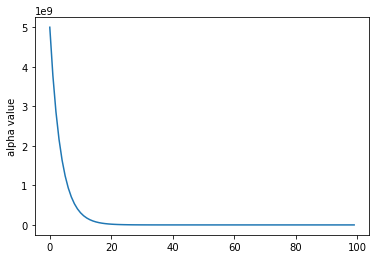

In [14]:
plt.plot(alphas)
plt.ylabel('alpha value');

In [15]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 43)

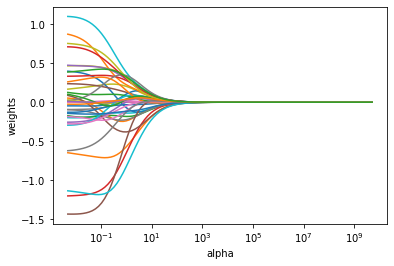

In [16]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [17]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.08148754173103201

In [18]:
ridge5 = Ridge(alpha = ridgecv.alpha_, normalize = True).fit(X_train, y_train)
mean_squared_error(y_test, ridge5.predict(X_test))
print('\nTraining MSE: ' + str(round(mean_squared_error(y_train, ridge5.predict(X_train)), 0)))
print('\nTest MSE:    ' + str(round(mean_squared_error(y_test, ridge5.predict(X_test)), 0)))


Training MSE: 1.0

Test MSE:    1.0


In [19]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(ridge.coef_, index=X.columns)

const                   0.000000e+00
CO_COUNTRY              5.275761e-02
BUDGET                  3.051241e-08
TOTAL_SUPPORT          -1.185294e-06
PRODUCTION_SUPPORT      2.549274e-06
DISTRIBUTION_SUPPORT    3.845924e-05
NAME_LENGTH             2.193783e-03
PREMIERE_1             -9.425986e-02
PREMIERE_2              1.668844e-01
PREMIERE_3             -1.981267e-01
PREMIERE_4              3.967718e-01
PREMIERE_5             -6.466424e-01
PREMIERE_6             -1.727846e-01
PREMIERE_7             -1.199112e+00
PREMIERE_8             -2.558490e-01
PREMIERE_9              2.365028e-01
PREMIERE_10             9.909286e-04
PREMIERE_11            -9.468255e-02
PREMIERE_12             4.648441e-01
Action                  1.097452e+00
Adventure              -4.686051e-02
Animation               8.703089e-01
Biography               1.252624e-01
Comedy                  3.321697e-01
Crime                   4.730181e-01
Documentary             8.642276e-02
Drama                  -1.838405e-01
F

In [20]:
zr = pd.Series(ridge.coef_, index=X.columns)
zrr = zr[zr!=0]
zrr = zrr.sort_values(ascending=False)
zrr

Action                  1.097452e+00
Animation               8.703089e-01
War                     7.518472e-01
Mystery                 7.089208e-01
Crime                   4.730181e-01
PREMIERE_12             4.648441e-01
PREMIERE_4              3.967718e-01
LENGTH180               3.858347e-01
Comedy                  3.321697e-01
Music                   2.604540e-01
PREMIERE_9              2.365028e-01
PREMIERE_2              1.668844e-01
Biography               1.252624e-01
Musical                 1.010099e-01
Documentary             8.642276e-02
CO_COUNTRY              5.275761e-02
Fantasy                 2.841421e-02
Family                  2.200266e-02
Romance                 1.158945e-02
NAME_LENGTH             2.193783e-03
PREMIERE_10             9.909286e-04
DISTRIBUTION_SUPPORT    3.845924e-05
PRODUCTION_SUPPORT      2.549274e-06
BUDGET                  3.051241e-08
TOTAL_SUPPORT          -1.185294e-06
LENGTH120              -2.526976e-02
Adventure              -4.686051e-02
P

OPTION 5, Lasso

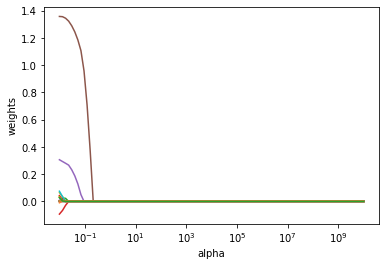

In [21]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train.astype(float)), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [22]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('\nTraining MSE: ' + str(round(mean_squared_error(y_train, lasso.predict(X_train)), 0)))
print('\nTest MSE:    ' + str(round(mean_squared_error(y_test, lasso.predict(X_test)), 0)))


Training MSE: 1.0

Test MSE:    1.0


In [23]:
lassocv.alpha_

0.005

In [24]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

const                   0.000000e+00
CO_COUNTRY             -0.000000e+00
BUDGET                  1.645191e-09
TOTAL_SUPPORT           0.000000e+00
PRODUCTION_SUPPORT      1.076910e-06
DISTRIBUTION_SUPPORT    3.984629e-05
NAME_LENGTH             0.000000e+00
PREMIERE_1              0.000000e+00
PREMIERE_2              0.000000e+00
PREMIERE_3             -2.323596e-03
PREMIERE_4              0.000000e+00
PREMIERE_5             -6.362259e-02
PREMIERE_6             -0.000000e+00
PREMIERE_7             -5.947839e-01
PREMIERE_8             -0.000000e+00
PREMIERE_9              7.713069e-02
PREMIERE_10             0.000000e+00
PREMIERE_11            -0.000000e+00
PREMIERE_12             2.299654e-01
Action                  4.498470e-01
Adventure               0.000000e+00
Animation               2.623390e-01
Biography               0.000000e+00
Comedy                  9.179404e-02
Crime                   4.954065e-02
Documentary            -0.000000e+00
Drama                  -8.240415e-04
F

In [25]:
z = pd.Series(lasso.coef_, index=X.columns)
zl = z[z!=0]
zl = zl.sort_values(ascending=False)
zl

Action                  4.498470e-01
Animation               2.623390e-01
PREMIERE_12             2.299654e-01
War                     1.440132e-01
LENGTH180               1.271932e-01
Comedy                  9.179404e-02
PREMIERE_9              7.713069e-02
Crime                   4.954065e-02
DISTRIBUTION_SUPPORT    3.984629e-05
PRODUCTION_SUPPORT      1.076910e-06
BUDGET                  1.645191e-09
Drama                  -8.240415e-04
PREMIERE_3             -2.323596e-03
PREMIERE_5             -6.362259e-02
PREMIERE_7             -5.947839e-01
dtype: float64

In [26]:
indices = np.argsort(z)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(z)[::-1]
feature_order = feature_order[:,i]

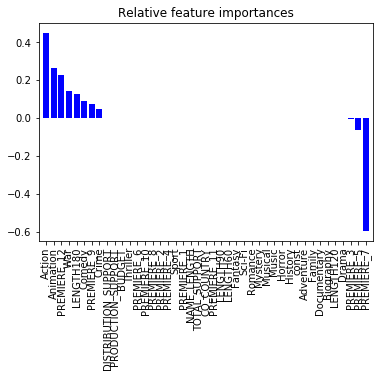

In [27]:
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), z[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [28]:
indices = np.argsort(zr)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(zr)[::-1]
feature_order = feature_order[:,i]

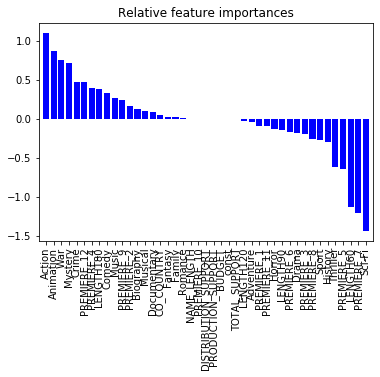

In [29]:
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), zr[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()